In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
report = pd.read_csv('Report/finalReport_2022-12-28.csv')
report.head()

,max_depth,min_samples_leaf,n_estimators,oob_score,classifier_score,ga_timetaken,hybrid_md,hybrid_msl,hybrid_ne,hybrid_oob_score,sa_timetaken,hybrid_timetaken
0,17,19,12,0.708995,0.654321,13.712285,11,19,14,0.714286,46.158871,60.003971
1,15,5,14,0.661376,0.654321,8.634015,8,20,14,0.714286,49.761600,58.477428
2,21,14,9,0.703704,0.617284,10.028571,17,19,13,0.714286,47.476443,57.610354
3,10,19,14,0.714286,0.641975,14.673628,18,20,14,0.714286,47.862897,62.687554
4,7,5,7,0.677249,0.629630,11.272930,18,19,13,0.714286,50.069232,61.453823


In [3]:
report.shape

(51, 12)

In [4]:
display(report['max_depth'].unique())
display(report['min_samples_leaf'].unique())
display(report['n_estimators'].unique())

array([17, 15, 21, 10,  7, 13, 14,  4, 16, 20,  9, 27,  8,  6, 11, 23, 12,
       22, 30, 19,  2, 18], dtype=int64)

array([19,  5, 14, 20,  2, 21, 13, 10, 16, 15, 22, 23, 18], dtype=int64)

array([12, 14,  9,  7, 15,  5, 13, 10,  3, 11,  6], dtype=int64)

In [5]:
report.query("max_depth <= 20", inplace=True)
report.query("min_samples_leaf <= 20", inplace=True)
report.query("n_estimators <= 20", inplace=True)
report.shape

(39, 12)

In [6]:
display(report[['oob_score', 'hybrid_oob_score']].nunique())
display(report['oob_score'].unique())
display(report['hybrid_oob_score'].unique())

oob_score           11
hybrid_oob_score     3
dtype: int64

array([0.70899471, 0.66137566, 0.71428571, 0.67724868, 0.7037037 ,
       0.6984127 , 0.66666667, 0.69312169, 0.68783069, 0.67195767,
       0.68253968])

array([0.71428571, 0.6984127 , 0.7037037 ])

In [7]:
report.drop_duplicates()
report = report.reset_index(drop=True)
report.shape

(39, 12)

In [8]:
gscv_report = pd.read_csv('Report/initialReport_2022-12-28.csv')
gscv_report.head()

,combos,cv_cnt,oob_score,classifier_score,time-taken
0,180,10,0.671958,0.62963,63.822724
1,180,5,0.671958,0.62963,69.873795
2,180,6,0.671958,0.62963,62.151759
3,180,1,0.671958,0.62963,80.855480
4,180,10,0.671958,0.62963,79.011138


In [9]:
gscv_report_imp = gscv_report[['cv_cnt','oob_score','time-taken']]
gscv_report_imp['oob_score'] = gscv_report_imp['oob_score']*100
gscv_report_imp

<ipython-input-9-7f5531faf545>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gscv_report_imp['oob_score'] = gscv_report_imp['oob_score']*100


,cv_cnt,oob_score,time-taken
0,10,67.195767,63.822724
1,5,67.195767,69.873795
2,6,67.195767,62.151759
3,1,67.195767,80.855480
4,10,67.195767,79.011138
5,0,67.195767,63.788210
6,1,67.195767,58.284040
7,6,67.195767,63.967118
8,9,67.195767,75.165589
9,9,67.195767,80.249373


# report

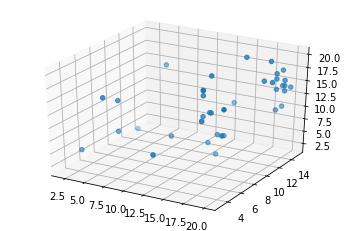

In [10]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = list(report['max_depth'])
xdata = list(report['min_samples_leaf'])
ydata = list(report['n_estimators'])
ax.scatter3D(xdata, ydata, zdata);

In [11]:
ga = report[['oob_score', 'ga_timetaken']]
ga.columns = ['oob_score_percent', 'timetaken']
ga['oob_score_percent'] = ga['oob_score_percent'].apply(lambda x: x*100)
ga['type'] = 'Genetic Algo'
ga

<ipython-input-11-e99de39dd895>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga['oob_score_percent'] = ga['oob_score_percent'].apply(lambda x: x*100)
<ipython-input-11-e99de39dd895>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga['type'] = 'Genetic Algo'


,oob_score_percent,timetaken,type
0,70.899471,13.712285,Genetic Algo
1,66.137566,8.634015,Genetic Algo
2,71.428571,14.673628,Genetic Algo
3,67.724868,11.272930,Genetic Algo
4,67.724868,7.905281,Genetic Algo
5,70.899471,16.057838,Genetic Algo
6,67.724868,5.572426,Genetic Algo
7,70.370370,11.316633,Genetic Algo
8,69.841270,8.278188,Genetic Algo
9,70.899471,12.881294,Genetic Algo


In [12]:
hy = report[['hybrid_oob_score', 'hybrid_timetaken']]
hy.columns = ['oob_score_percent', 'timetaken']
hy['oob_score_percent'] = hy['oob_score_percent'].apply(lambda x: x*100)
hy['type'] = 'Hybrid Algo'
hy

<ipython-input-12-270108fac586>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hy['oob_score_percent'] = hy['oob_score_percent'].apply(lambda x: x*100)
<ipython-input-12-270108fac586>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hy['type'] = 'Hybrid Algo'


,oob_score_percent,timetaken,type
0,71.428571,60.003971,Hybrid Algo
1,71.428571,58.477428,Hybrid Algo
2,71.428571,62.687554,Hybrid Algo
3,71.428571,61.453823,Hybrid Algo
4,71.428571,56.650117,Hybrid Algo
5,71.428571,71.313737,Hybrid Algo
6,71.428571,53.602943,Hybrid Algo
7,71.428571,58.460517,Hybrid Algo
8,71.428571,62.010509,Hybrid Algo
9,71.428571,62.034771,Hybrid Algo


In [13]:
final_report = pd.concat([ga, hy])
display(final_report.shape)
final_report.sample(10)

(78, 3)

,oob_score_percent,timetaken,type
22,71.428571,13.502628,Genetic Algo
24,71.428571,66.035027,Hybrid Algo
38,67.195767,11.800297,Genetic Algo
2,71.428571,62.687554,Hybrid Algo
22,70.370370,67.998234,Hybrid Algo
9,70.899471,12.881294,Genetic Algo
11,71.428571,57.217350,Hybrid Algo
37,68.253968,11.901170,Genetic Algo
5,70.899471,16.057838,Genetic Algo
10,71.428571,63.804570,Hybrid Algo


In [14]:
meanFR = final_report.groupby(['type']).mean().reset_index()
meanFR

,type,oob_score_percent,timetaken
0,Genetic Algo,69.529236,11.504799
1,Hybrid Algo,71.279338,59.925761


In [16]:
medianFR = final_report.groupby(['type']).median().reset_index()
medianFR

,type,oob_score_percent,timetaken
0,Genetic Algo,69.841270,11.800297
1,Hybrid Algo,71.428571,58.477428


In [18]:
final_report.groupby(['type']).describe().reset_index()

type oob_score_percent                                             \
                            count       mean       std        min        25%   
0  Genetic Algo              39.0  69.529236  1.723986  66.137566  67.989418   
1   Hybrid Algo              39.0  71.279338  0.453345  69.841270  71.428571   

                                   timetaken                                  \
         50%        75%        max     count       mean       std        min   
0  69.841270  70.899471  71.428571      39.0  11.504799  2.713712   5.572426   
1  71.428571  71.428571  71.428571      39.0  59.925761  5.598670  51.647724   

                                               
         25%        50%        75%        max  
0   9.652032  11.800297  13.607457  16.057838  
1  55.341027  58.477428  63.742322  71.448677

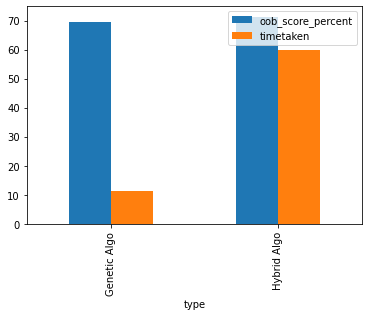

In [16]:
# # plotting Height
# ax = meanFR.plot(x="type", y="oob_score_percent", kind="bar")
# # plotting age on the same axis
# meanFR.plot(x="type", y="timetaken", kind="bar", ax=ax, color="orange")
meanFR.plot(x="type", y=["oob_score_percent", "timetaken"], kind="bar")

#### Understanding the plot of (score) and (time taken to calc the score) by Genetic algorithm and Simulated Anneling algorithm

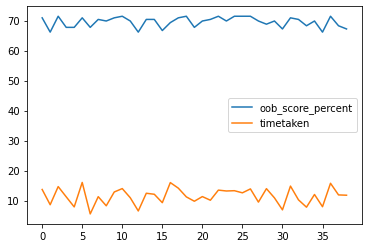

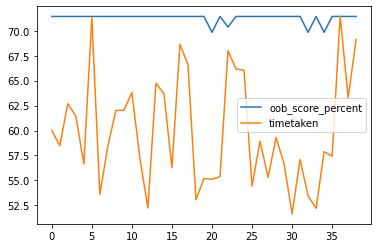

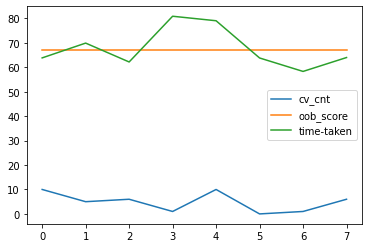

In [17]:
ga.plot()
hy.plot()
gscv_report_imp.plot()

#### Understanding the (score/fitness) by Genetic algorithm and Simulated Anneling algorithm <br/> and (time taken to calc the score) by Genetic algorithm and Simulated Anneling algorithm

c:\Users\Jegadit\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Jegadit\anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\Jegadit\anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\Jegadit\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Jegadit\anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


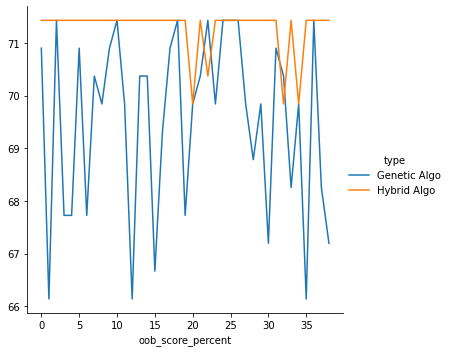

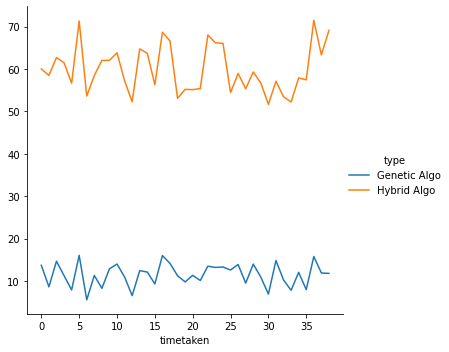

In [18]:
g = sns.FacetGrid(final_report, hue="type", size=5)
g.map(plt.plot, "oob_score_percent")
g.add_legend()

g = sns.FacetGrid(final_report, hue="type", size=5)
g.map(plt.plot, "timetaken")
g.add_legend()

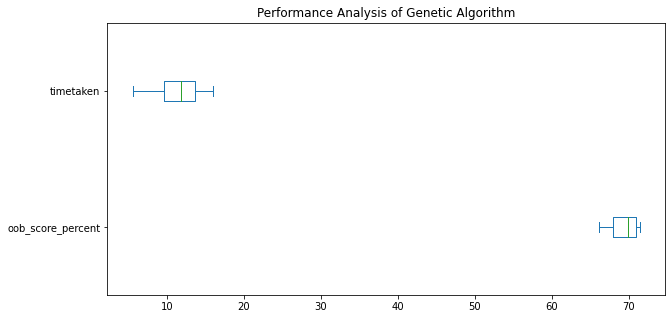

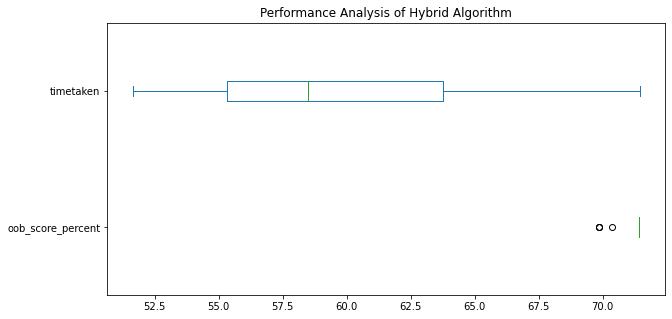

In [19]:
ga.plot(kind='box', vert=False, figsize=[10,5])
plt.title('Performance Analysis of Genetic Algorithm')
plt.show()

hy.plot(kind='box', vert=False ,figsize=[10,5])
plt.title('Performance Analysis of Hybrid Algorithm')
plt.show()

In [28]:
initRep = pd.read_csv('Report/initialReport_2022-12-28.csv')
initRep['oob_score'] = initRep['oob_score'] * 100
initRep

,combos,cv_cnt,oob_score,classifier_score,time-taken
0,180,10,67.195767,0.62963,63.822724
1,180,5,67.195767,0.62963,69.873795
2,180,6,67.195767,0.62963,62.151759
3,180,1,67.195767,0.62963,80.855480
4,180,10,67.195767,0.62963,79.011138
5,180,0,67.195767,0.62963,63.788210
6,180,1,67.195767,0.62963,58.284040
7,180,6,67.195767,0.62963,63.967118
8,180,9,67.195767,0.62963,75.165589


In [43]:
initRep.describe()

,combos,cv_cnt,oob_score,classifier_score,time-taken
count,9.0,9.000000,9.000000e+00,9.000000e+00,9.000000
mean,180.0,5.333333,6.719577e+01,6.296296e-01,68.546650
std,0.0,3.937004,1.410934e-09,1.234568e-10,8.052411
min,180.0,0.000000,6.719577e+01,6.296296e-01,58.284040
25%,180.0,1.000000,6.719577e+01,6.296296e-01,63.788210
50%,180.0,6.000000,6.719577e+01,6.296296e-01,63.967118
75%,180.0,9.000000,6.719577e+01,6.296296e-01,75.165589
max,180.0,10.000000,6.719577e+01,6.296296e-01,80.855480


In [53]:
display(initRep['time-taken'].mean())
display(initRep['oob_score'].mean())
display(hy['timetaken'].mean())
display(hy['oob_score_percent'].mean())

68.5466504094378

67.19576719623753

59.92576066041604

71.27933794600463

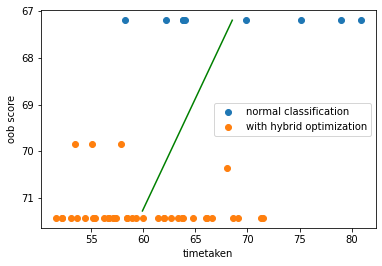

In [78]:
plt.xlabel('timetaken')
plt.ylabel('oob score')
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.scatter(initRep['time-taken'], initRep['oob_score'])
plt.scatter(hy['timetaken'], hy['oob_score_percent']) 
plt.legend(['normal classification','with hybrid optimization'])
plt.plot([initRep['time-taken'].mean(), hy['timetaken'].mean()], [initRep['oob_score'].mean(), hy['oob_score_percent'].mean()], color='green')

In [29]:
ml_models = ['Logistic Regression','K Nearest Neighbors Classifier','Gaussian Naïve Bayes','Random Forest Classifier (Unoptimized)','Support Vector Machine','Decision Tree Classifier','GA_RFC','HGASA_RFC']
scores = [0.654320987654321,0.654320987654321,0.6666666666666666,0.671957671957672,0.6790123456790124,0.6790123456790124,0.6952923613324621,0.7142857142857143]
for i in range(len(scores)):
    scores[i] *= 100

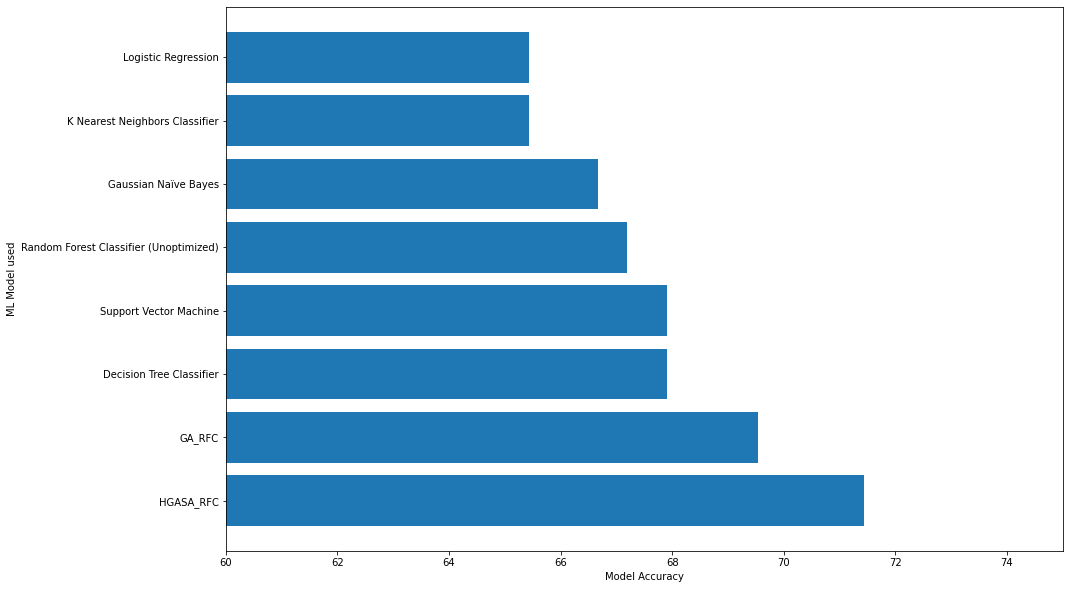

In [30]:
fig = plt.figure(figsize=(15,10))
plt.barh(ml_models[::-1], scores[::-1])
plt.xlim(60)
plt.xlabel('Model Accuracy')
plt.ylabel('ML Model used')
plt.show()